In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
Asma = np.load('Treino_teste/Asma.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = Asma['X_treino'], Asma['X_teste'], Asma['y_treino'], Asma['y_teste'], list(Asma['feature_names'])

In [16]:
len(X_treino)

25015

In [17]:
Asma_over = np.load('Treino_teste/Asma_Over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= Asma_over['X_treino'], Asma_over['X_teste'], Asma_over['y_treino'], Asma_over['y_teste'], list(Asma_over['feature_names'])

In [18]:
len(X_treino_over)

46908

In [19]:
Asma_under = np.load('Treino_teste/Asma_Under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = Asma_under['X_treino'], Asma_under['X_teste'], Asma_under['y_treino'], Asma_under['y_teste'], list(Asma_under['feature_names'])

In [20]:
len(X_treino_under)

24587

In [21]:
Asma_random_under = np.load('Treino_teste/Asma_RD_Under.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = Asma_random_under['X_treino'], Asma_random_under['X_teste'], Asma_random_under['y_treino'], Asma_random_under['y_teste'], list(Asma_random_under['feature_names'])

In [22]:
len(X_treino_rd_under)

3122

In [23]:
Asma_DSTO = np.load('Treino_teste/Asma_DSTO.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = Asma_DSTO['X_treino'], Asma_DSTO['X_teste'], Asma_DSTO['y_treino'], Asma_DSTO['y_teste'], list(Asma_DSTO['feature_names'])

In [24]:
len(X_treino_DSTO)

46908

## Parametros e funcoes

In [25]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'n_estimators': Integer(50, 150),
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]
}

# Modelos

### Modelo Padrao

In [26]:
bayes_search = BayesSearchCV(RandomForestClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 9, 'min_samples_split': 18, 'n_estimators': 133})
Melhor pontuação de validação cruzada: 0.94


In [27]:
best_model_bayes = bayes_search.best_estimator_

### Resultados

In [28]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.94


In [29]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.56      0.01      0.02       633
           2       0.94      1.00      0.97     10089

    accuracy                           0.94     10722
   macro avg       0.75      0.50      0.49     10722
weighted avg       0.92      0.94      0.91     10722



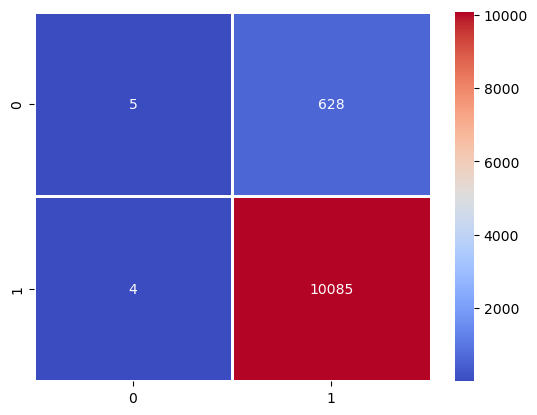

In [30]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Variáveis mais relevantes:
Q11604: 0.15972194498108985
V0022: 0.09219776058841388
A02201|A02305|A02306: 0.08084796858145558
P034|P035: 0.06902058030098301
C008: 0.06719925165991592
N010: 0.06661612498465141
C009: 0.057056459198017696
P00404: 0.05668788588877504
IMC: 0.05248554077779495
P05901|P05902|P05903|P05904: 0.045391107411591636
P00104: 0.04069575108349415
P053: 0.03975712261160202
P03701|P03702: 0.038277345354548256
V0001: 0.03722400248907449
C006: 0.0301462442259249
Q092: 0.02713759975185207
Q11006: 0.019917941539611655
P050|P052: 0.019619368571203517


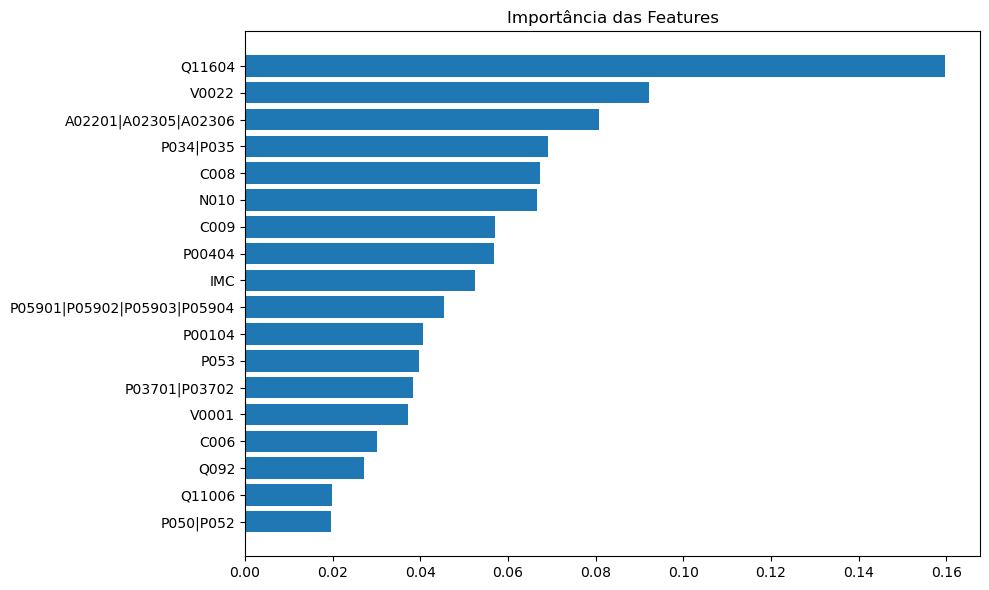

In [31]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### OverSampling

In [32]:
bayes_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['entropy', 10, 'sqrt', 1, 2, 150] before, using random point ['gini', 3, 'log2', 4, 9, 80]
  warnings.warn(



Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 10, 'max_features': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150})
Melhor pontuação de validação cruzada: 0.75


In [33]:
best_model_bayes = bayes_search.best_estimator_

In [34]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [35]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.08      0.39      0.13       633
           2       0.95      0.72      0.82     10089

    accuracy                           0.70     10722
   macro avg       0.52      0.56      0.48     10722
weighted avg       0.90      0.70      0.78     10722



Variáveis mais relevantes:
C008: 0.12305364204838018
Q11604: 0.10914863810129335
Q092: 0.08311752320529897
A02201|A02305|A02306: 0.08099566107561604
P03701|P03702: 0.07428034725287663
V0022: 0.07384481763781464
P00404: 0.0704567253039767
P053: 0.056857319248537395
C009: 0.05324882188091728
Q11006: 0.038367801965989046
V0001: 0.03628156617663775
P034|P035: 0.034645244904485735
P00104: 0.03364684660095733
IMC: 0.0332885814698108
N010: 0.028956588961012004
P05901|P05902|P05903|P05904: 0.027013838109751796
C006: 0.025201646760940874
P050|P052: 0.017594389295703408


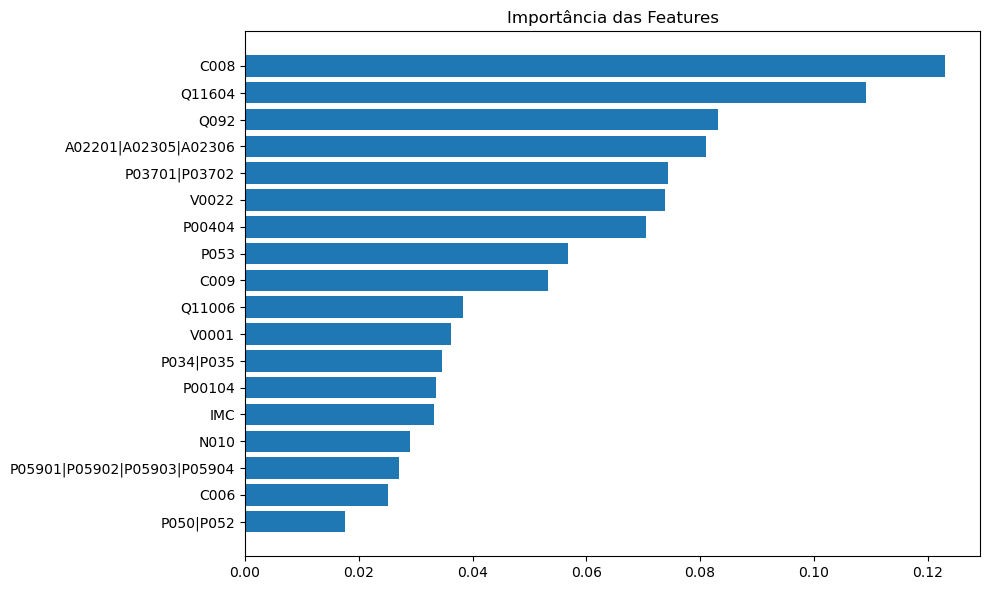

In [36]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### UnderSampling

In [37]:
bayes_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 149})
Melhor pontuação de validação cruzada: 0.94


In [38]:
best_model_bayes = bayes_search.best_estimator_

In [39]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [40]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.67      0.02      0.03       633
           2       0.94      1.00      0.97     10089

    accuracy                           0.94     10722
   macro avg       0.80      0.51      0.50     10722
weighted avg       0.93      0.94      0.91     10722



Variáveis mais relevantes:
Q11604: 0.26586432969455726
N010: 0.07324755848238304
V0022: 0.07316745185167556
C008: 0.06719774170226057
A02201|A02305|A02306: 0.06363001312554944
C009: 0.048496790420220245
IMC: 0.0458195538754069
P034|P035: 0.0443011841100473
V0001: 0.04314962697374541
Q092: 0.0420214255330274
P00404: 0.038730225795025275
C006: 0.03620800307504034
P00104: 0.03416663226377081
P053: 0.030754913532686227
P05901|P05902|P05903|P05904: 0.030558385121593132
P03701|P03702: 0.027938715975032315
Q11006: 0.01811961684999728
P050|P052: 0.016627831617981648


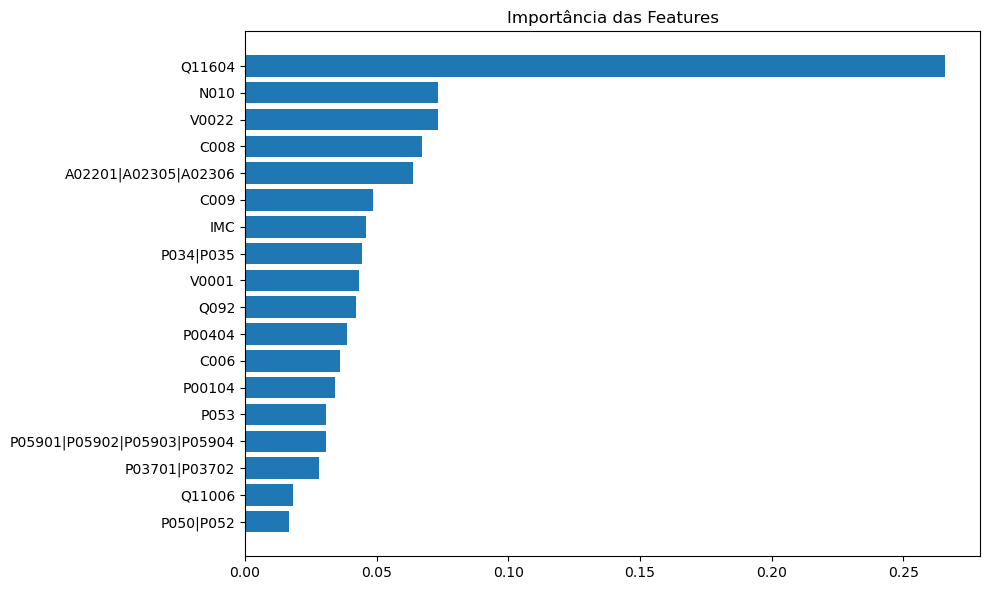

In [41]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### Random UnderSampling

In [42]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 1, 'max_features': 0.2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 66})
Melhor pontuação de validação cruzada: 0.57


In [43]:
best_model_bayes = bayes_search.best_estimator_

In [44]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [45]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.10      0.37      0.15       633
           2       0.95      0.78      0.86     10089

    accuracy                           0.76     10722
   macro avg       0.52      0.58      0.51     10722
weighted avg       0.90      0.76      0.82     10722



Variáveis mais relevantes:
Q092: 0.24242424242424243
Q11604: 0.15151515151515152
Q11006: 0.13636363636363635
N010: 0.10606060606060606
V0001: 0.09090909090909091
C006: 0.07575757575757576
A02201|A02305|A02306: 0.06060606060606061
P00404: 0.045454545454545456
C009: 0.030303030303030304
C008: 0.030303030303030304
P034|P035: 0.015151515151515152
P053: 0.015151515151515152
P03701|P03702: 0.0
P00104: 0.0
P050|P052: 0.0
P05901|P05902|P05903|P05904: 0.0
V0022: 0.0
IMC: 0.0


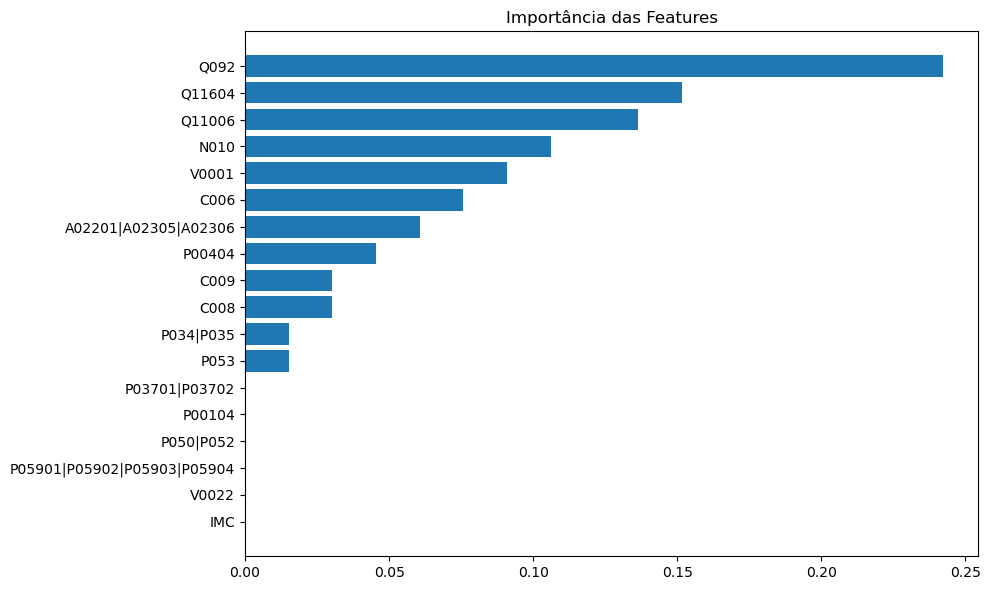

In [46]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### DSTO

In [47]:
bayes_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.2, 'min_samples_leaf': 7, 'min_samples_split': 18, 'n_estimators': 122})
Melhor pontuação de validação cruzada: 0.97


In [48]:
best_model_bayes = bayes_search.best_estimator_

In [49]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [50]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       633
           2       0.94      1.00      0.97     10089

    accuracy                           0.94     10722
   macro avg       0.47      0.50      0.48     10722
weighted avg       0.89      0.94      0.91     10722



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Variáveis mais relevantes:
Q11604: 0.30658330456843763
Q092: 0.15865178374989572
Q11006: 0.12254766196139745
P05901|P05902|P05903|P05904: 0.0893343505944428
P034|P035: 0.08341943996211547
P053: 0.05588197600636783
V0001: 0.04357108688467412
P050|P052: 0.034579969964161836
N010: 0.024268462771288427
P00104: 0.02359433977943818
C006: 0.018417616167921997
IMC: 0.014257186627851502
P03701|P03702: 0.012395624734536129
A02201|A02305|A02306: 0.006051890636165822
C009: 0.00425076485134636
P00404: 0.0017153245798964215
C008: 0.0004293261089060597
V0022: 4.989005115621766e-05


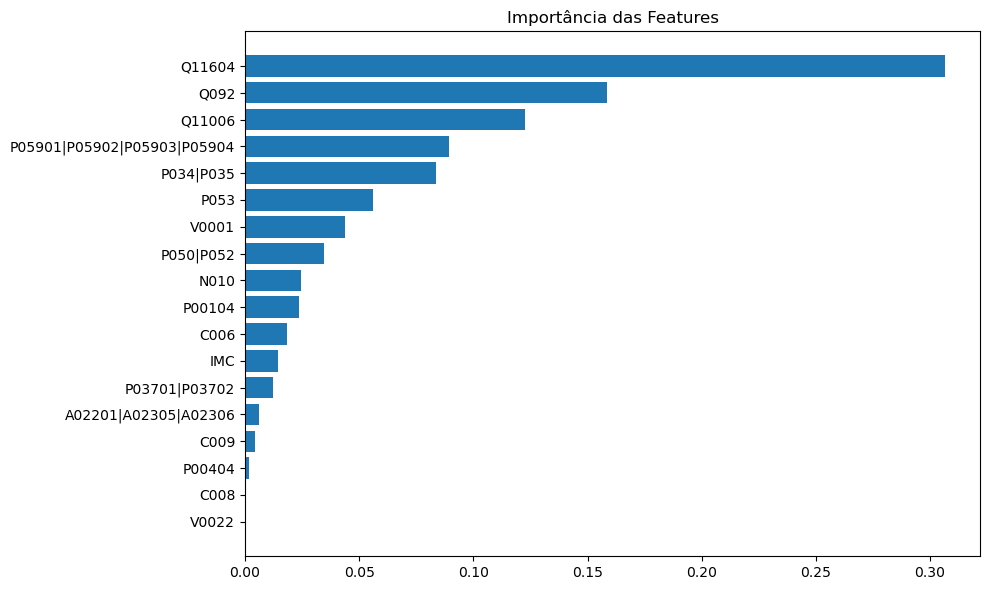

In [51]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()